In [2]:
import requests
import json
import pandas as pd

In [18]:
def get_fpl_data():
    # URL for the FPL API endpoint
    url = "https://fantasy.premierleague.com/api/bootstrap-static/"

    # Sending a GET request to the API
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parsing the JSON data
        data = response.json()
        return data
    else:
        print("Failed to retrieve data")
        return None

In [25]:
data = get_fpl_data()

In [ ]:
def create_dataframe(fpl_data):
    # Extracting players and their stats
    players = fpl_data['elements']
    player_data = []

    for player in players:
        player_info = {
            'player_id': player['id'],
            'player_name': player['web_name'],
            # Add more player attributes here as needed
        }
        player_data.append(player_info)

    df_players = pd.DataFrame(player_data)

    # Create a DataFrame to store gameweek data
    gameweeks = fpl_data['events']
    gameweek_data = []

    for gameweek in gameweeks:
        gw_info = {
            'gameweek_id': gameweek['id'],
            'gameweek_name': gameweek['name'],
            # Add more gameweek attributes here as needed
        }
        gameweek_data.append(gw_info)

    df_gameweeks = pd.DataFrame(gameweek_data)

    # Now you might want to merge or process these DataFrames further
    # to create a DataFrame for each gameweek for each player
    # This is a complex task and depends on the specific stats you want to include

    return df_players, df_gameweeks


In [ ]:
# fpl_data = get_fpl_data()
df_players, df_gameweeks = create_dataframe(fpl_data)

In [ ]:
df_gameweeks

,gameweek_id,gameweek_name
0,1,Gameweek 1
1,2,Gameweek 2
2,3,Gameweek 3
3,4,Gameweek 4
4,5,Gameweek 5
5,6,Gameweek 6
6,7,Gameweek 7
7,8,Gameweek 8
8,9,Gameweek 9
9,10,Gameweek 10


In [3]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
base_path = '/content/gdrive/MyDrive/Final_Project_Datasets/PL_Data/data'

Mounted at /content/gdrive


In [4]:
sorted([i for i in os.listdir(base_path) if i[0:2] == '20'])[-4:]

['2020-21', '2021-22', '2022-23', '2023-24']

In [5]:
main_df = pd.DataFrame()
for season in sorted([i for i in os.listdir(base_path) if i[0:2] == '20'])[-4:]:
  if 'merged_gw.csv' in os.listdir(base_path + '/' + season + '/gws'):
    columns = ['name','GW', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded', 'goals_scored', 'influence',
               'kickoff_time', 'minutes', 'name', 'opponent_team', 'own_goals', 'penalties_missed', 'penalties_saved', 'position',
               'red_cards', 'round', 'saves', 'selected', 'team', 'team_a_score', 'team_h_score', 'threat', 'total_points', 'value', 'was_home', 'xP', 'yellow_cards']
    df = pd.read_csv(base_path + '/' + season + '/gws/merged_gw.csv', encoding='latin-1')
    df = df[columns]
    df['season'] = season
    main_df = pd.concat(objs = [main_df,df]).reset_index(drop = True)
    print(df.columns)

Index(['name', 'GW', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'influence',
       'kickoff_time', 'minutes', 'name', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'position', 'red_cards', 'round',
       'saves', 'selected', 'team', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'value', 'was_home', 'xP', 'yellow_cards', 'season'],
      dtype='object')
Index(['name', 'GW', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'influence',
       'kickoff_time', 'minutes', 'name', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'position', 'red_cards', 'round',
       'saves', 'selected', 'team', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'value', 'was_home', 'xP', 'yellow_cards', 'season'],
      dtype='object')
Index(['name', 'GW', 'assists', 'b

In [6]:
team_df = pd.read_csv(base_path + '/master_team_list.csv' )
team_df['team'] = team_df['team'].astype(object)
team_df.columns = ['season','opponent_team','opponent_team_name']

In [61]:
team_df

,season,opponent_team,opponent_team_name
0,2016-17,1,Arsenal
1,2016-17,2,Bournemouth
2,2016-17,3,Burnley
3,2016-17,4,Chelsea
4,2016-17,5,Crystal Palace
...,...,...,...
155,2023-24,16,Nott'm Forest
156,2023-24,17,Sheffield Utd
157,2023-24,18,Spurs
158,2023-24,19,West Ham


In [60]:
main_df.shape

(84116, 34)

In [8]:
# team_df

master_df = pd.merge(main_df, team_df, how = 'inner', on = ['opponent_team','season'])

In [213]:
master_df.to_csv('master_df.csv',index= False)

In [10]:
base_path = '/content/gdrive/MyDrive/Final_Project_Datasets/PL_Data'
# filelist = [file for file in os.listdir(base_path) if file.endswith('.csv')]
# for file in filelist:
#     print(file)
#     exec("%s = pd.read_csv('%s/%s')" % (file.split('.')[0], base_path, file))

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
df = master_df.copy()
df.columns = ['name', 'GW', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'influence',
       'kickoff_time', 'minutes', 'name_remove', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'position', 'red_cards', 'round',
       'saves', 'selected', 'team', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'value', 'was_home', 'xP', 'yellow_cards', 'season',
       'opponent_team_name']
df = df.drop(columns = [df.columns[14]])
df['position'] = np.where(df['position'] == 'GKP','GK',df['position'])

In [12]:
df = df[df['minutes']>0].reset_index(drop = True)

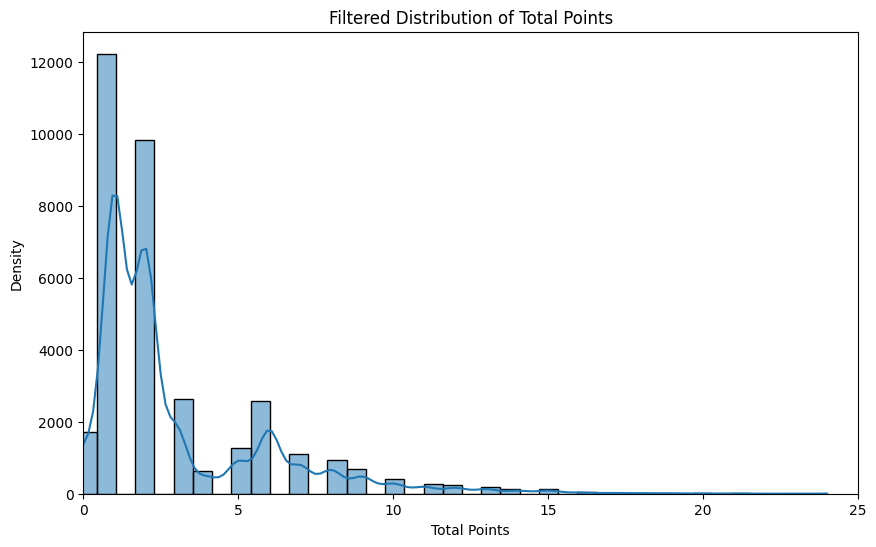

In [ ]:
plt.figure(figsize=(10, 6))  # Increase figure size
sns.histplot(df['total_points'], bins=50, kde=True)  # Adjust bins and add KDE
plt.title('Filtered Distribution of Total Points')
plt.xlabel('Total Points')
plt.ylabel('Density')  # Change to 'Density' since KDE is a density plot
plt.xlim(0, 25)  # Zoom in on the x-axis to the range of interest
plt.show()


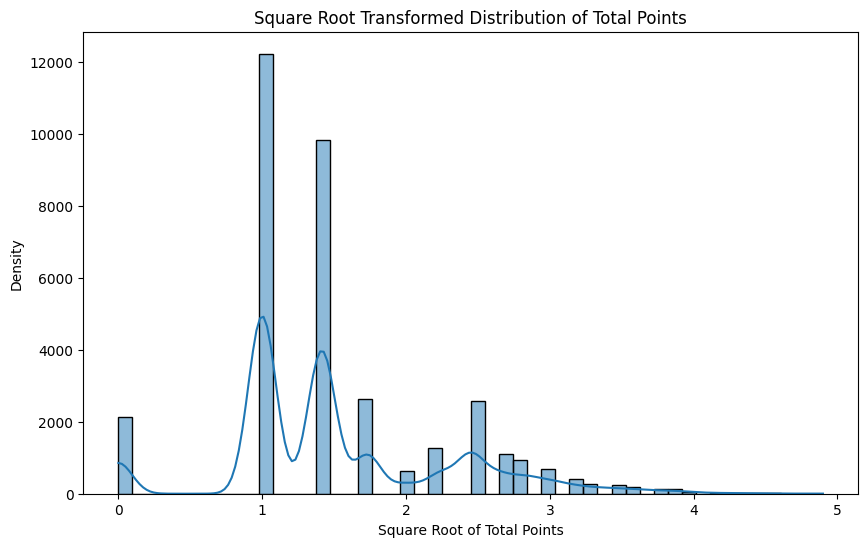

In [ ]:
# Apply a square root transformation
df['sqrt_total_points'] = df['total_points'].apply(lambda x: x**0.5 if x > 0 else 0)

plt.figure(figsize=(10, 6))
sns.histplot(df['sqrt_total_points'], bins=50, kde=True)
plt.title('Square Root Transformed Distribution of Total Points')
plt.xlabel('Square Root of Total Points')
plt.ylabel('Density')
plt.show()


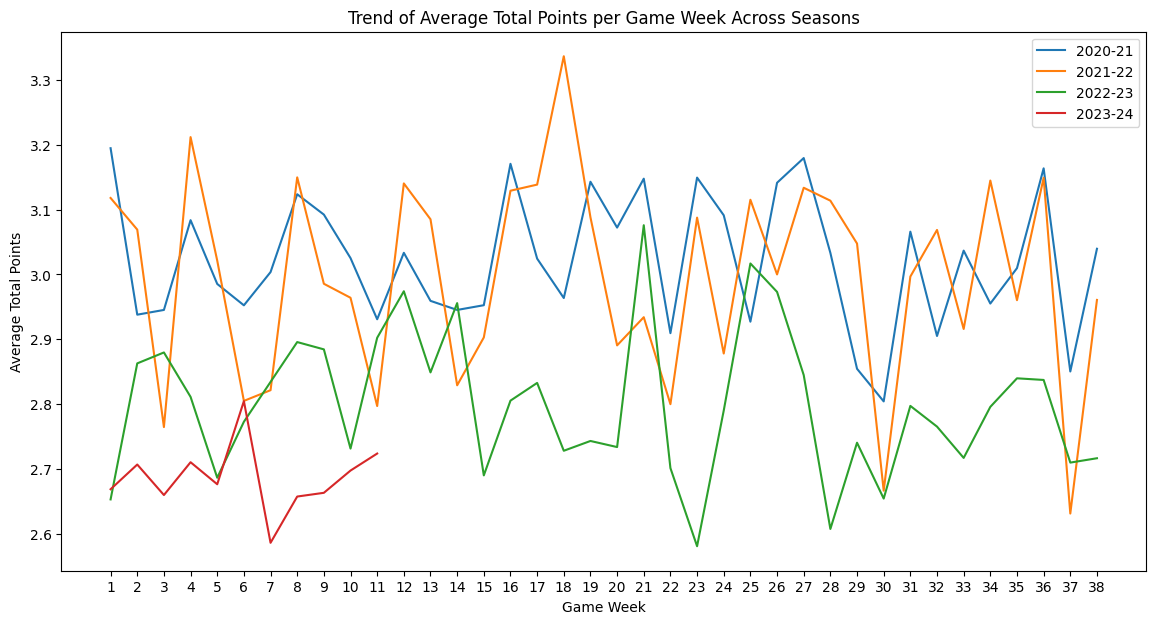

In [ ]:
# Assuming 'df' is your DataFrame
season_gw_grouped = df.groupby(['season', 'GW'])['total_points'].mean().reset_index()
# Plot settings
plt.figure(figsize=(14, 7))

# Unique seasons in the dataset
seasons = season_gw_grouped['season'].unique()

# Plotting each season's trend
for season in seasons:
    season_data = season_gw_grouped[season_gw_grouped['season'] == season]
    plt.plot(season_data['GW'], season_data['total_points'], label=season)

# Final plot settings
plt.title('Trend of Average Total Points per Game Week Across Seasons')
plt.xlabel('Game Week')
plt.ylabel('Average Total Points')
plt.legend()
plt.xticks(range(1, season_gw_grouped['GW'].max() + 1))  # Adjust x-axis ticks if necessary
plt.show()


In [ ]:
# Assuming 'df' is your DataFrame and it includes a 'position' column

# Group by position and calculate mean for relevant performance metrics
player_aggregated = df.groupby(['name', 'position','season']).agg({
    'total_points': 'sum',    # Total points across all game weeks
    'goals_scored': 'sum',    # Total goals scored across all game weeks
    'assists': 'sum',         # Total assists across all game weeks
    'clean_sheets': 'sum',  # Total clean sheets across all game weeks
    'minutes': 'sum',         # Total minutes played across all game weeks
    'goals_conceded': 'sum'   # Total goals conceded while the player was playing across all game weeks
}).reset_index()

In [ ]:
# Calculate mean or sum of the player-level stats by position
position_performance = player_aggregated.groupby('position').agg({
    'total_points': 'mean',  # Mean points by position
    'goals_scored': 'mean',  # Mean goals scored by position
    'assists': 'mean',       # Mean assists by position
    'clean_sheets': 'mean',  # Mean clean sheets by position
    'minutes': 'mean',       # Mean minutes played by position
    'goals_conceded': 'mean' # Mean goals conceded by position
}).reset_index()


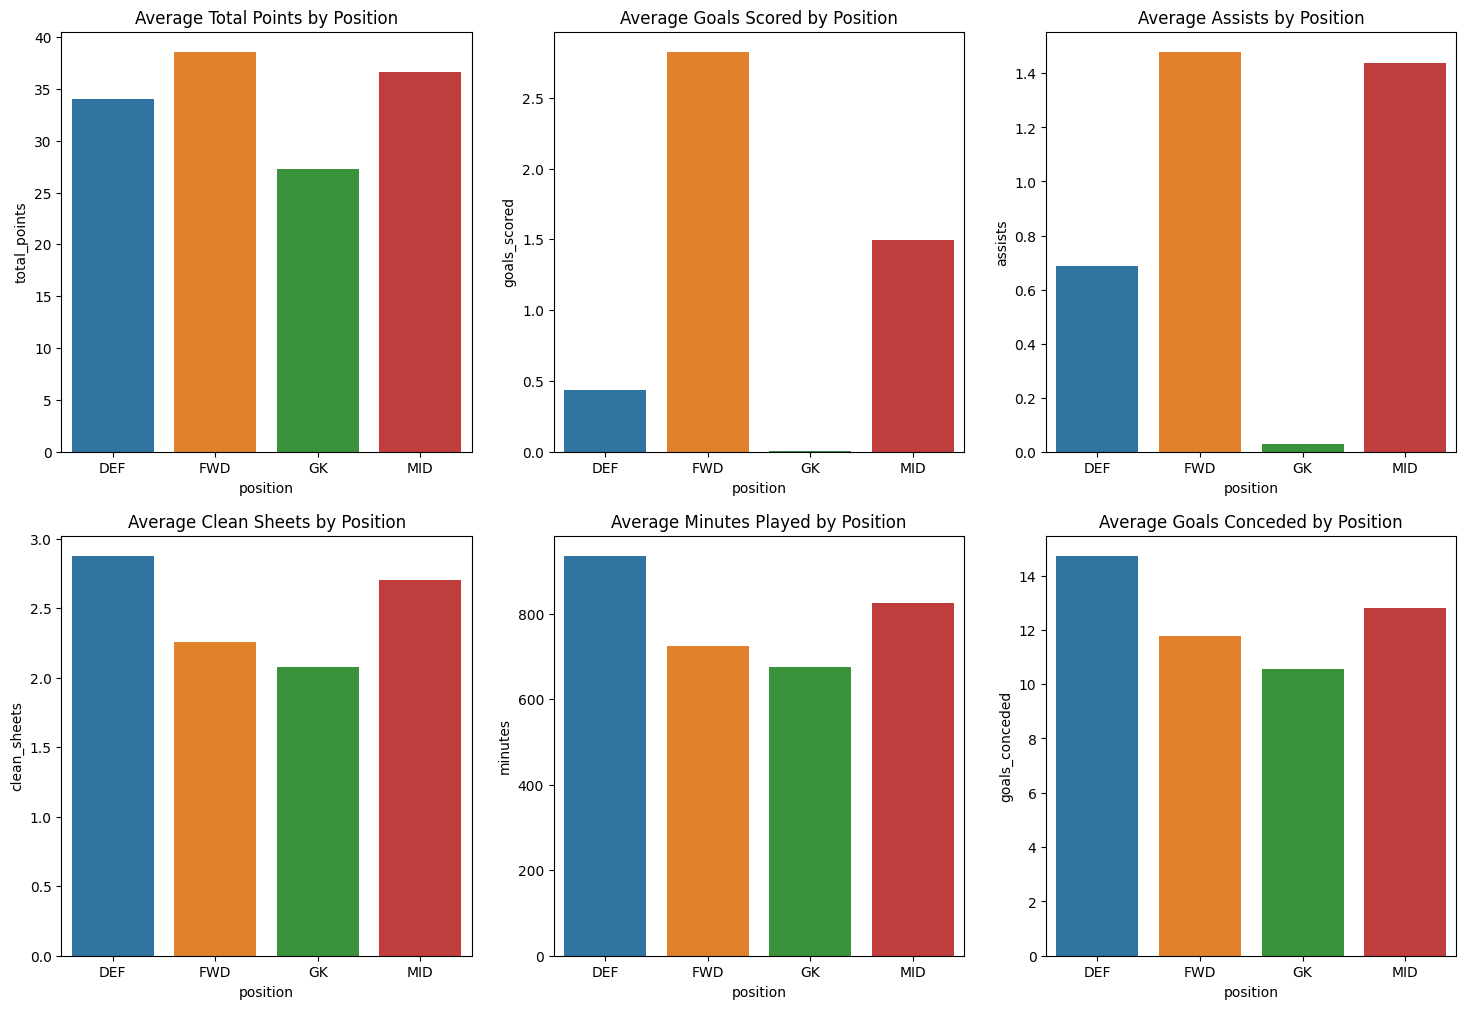

In [ ]:
# Visualize the aggregated data including 'saves'
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Adjust for 3x3 subplot grid

# Plotting each metric by position
sns.barplot(x='position', y='total_points', data=position_performance, ax=axes[0, 0])
axes[0, 0].set_title('Average Total Points by Position')

sns.barplot(x='position', y='goals_scored', data=position_performance, ax=axes[0, 1])
axes[0, 1].set_title('Average Goals Scored by Position')

sns.barplot(x='position', y='assists', data=position_performance, ax=axes[0, 2])
axes[0, 2].set_title('Average Assists by Position')

# sns.barplot(x='position', y='saves', data=position_performance, ax=axes[1, 0])
# axes[1, 0].set_title('Average Saves by Position')

sns.barplot(x='position', y='clean_sheets', data=position_performance, ax=axes[1, 0])
axes[1, 0].set_title('Average Clean Sheets by Position')

sns.barplot(x='position', y='minutes', data=position_performance, ax=axes[1, 1])
axes[1, 1].set_title('Average Minutes Played by Position')

sns.barplot(x='position', y='goals_conceded', data=position_performance, ax=axes[1, 2])
axes[1, 2].set_title('Average Goals Conceded by Position')

# The remaining subplots can be left empty or used for other metrics if you have them
# axes[2, 1].axis('off')  # Hide this subplot if no data to display
# axes[2, 2].axis('off')  # Hide this subplot if no data to display

plt.show()


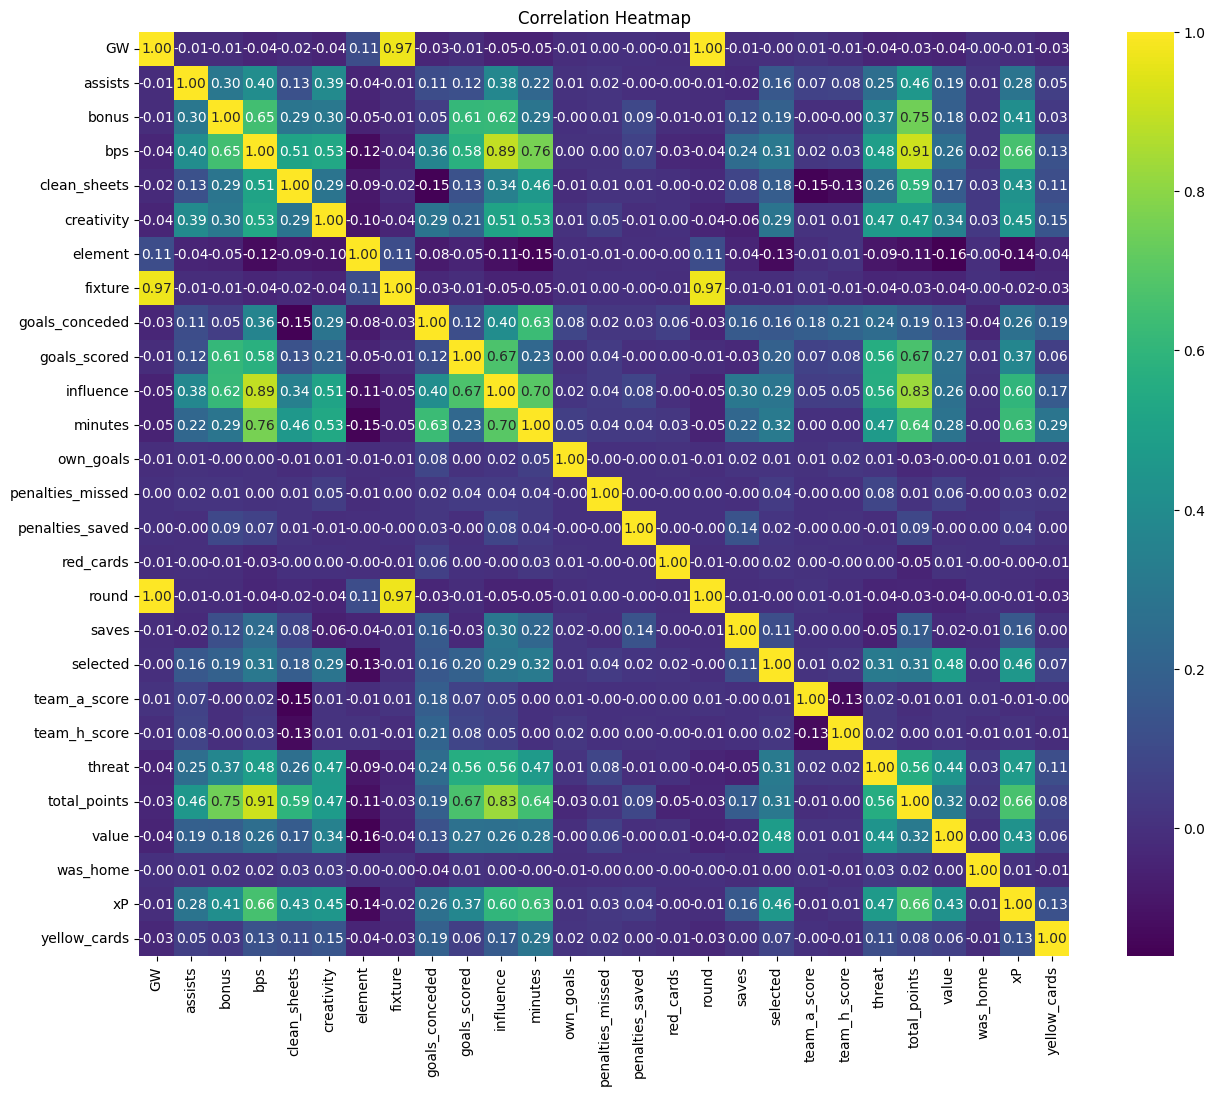

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Aggregate player stats per season
player_season_stats = df.groupby(['name', 'season']).agg({
    'total_points': 'sum',
    'minutes': 'sum',
    # Add other relevant stats as needed
}).reset_index()


In [ ]:
# Calculate mean and std dev of total points per player across seasons
player_consistency = player_season_stats.groupby('name').agg({
    'total_points': ['mean', 'std', 'count']  # 'count' for the number of seasons played
}).reset_index()

# Flatten the MultiIndex columns
player_consistency.columns = ['name', 'average_points', 'std_dev_points', 'seasons_played']

# Filter players who have played at least 'X' seasons to ensure a fair comparison
min_seasons = 3
consistent_players = player_consistency[player_consistency['seasons_played'] >= min_seasons]

# Sort by standard deviation to find the most consistent players
consistent_players.sort_values('std_dev_points', inplace=True, ascending = False)


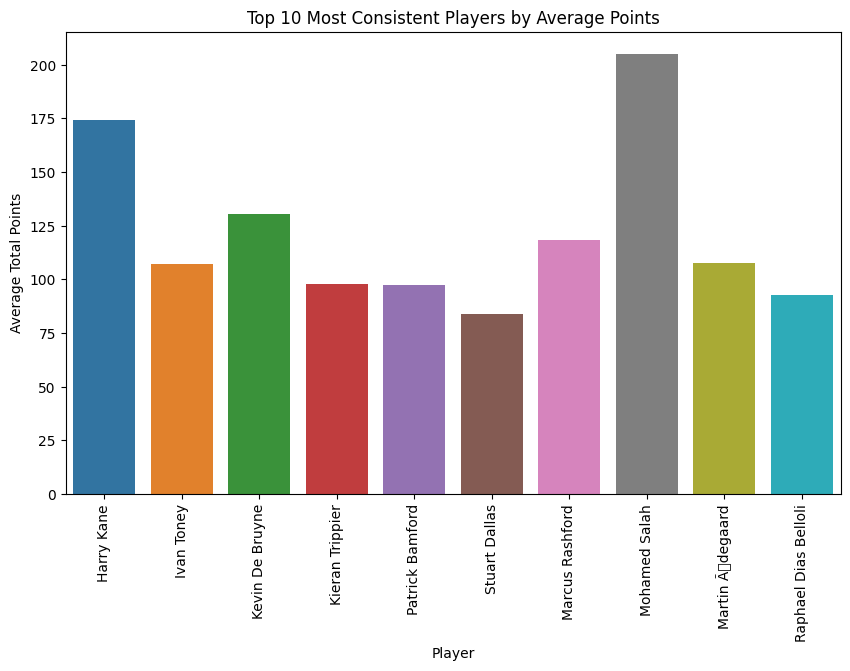

In [ ]:
# Visualize the top 10 most consistent players
top_consistent_players = consistent_players.head(10)

# Bar plot for average points
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='average_points', data=top_consistent_players)
plt.xticks(rotation=90)
plt.title('Top 10 Most Consistent Players by Average Points')
plt.xlabel('Player')
plt.ylabel('Average Total Points')
plt.show()

In [ ]:
# Aggregate player stats by position and season
player_position_season_stats = df.groupby(['name', 'position', 'season']).agg({
    'total_points': 'sum',
    # Add other relevant stats if necessary
}).reset_index()


In [ ]:
# Calculate mean, standard deviation, and count of total points for each player by position
player_position_consistency = player_position_season_stats.groupby(['name', 'position']).agg({
    'total_points': ['mean', 'std', 'count']
}).reset_index()

# Flatten MultiIndex columns
player_position_consistency.columns = ['name', 'position', 'average_points', 'std_dev_points', 'seasons_played']

# Filter out players who haven't played in a minimum number of seasons
min_seasons = 3  # Or another number you deem appropriate
consistent_players_by_position = player_position_consistency[player_position_consistency['seasons_played'] >= min_seasons]

# Sort by standard deviation within each position to find the most consistent players
consistent_players_by_position.sort_values(['position', 'std_dev_points'], ascending=[False, False], inplace=True)


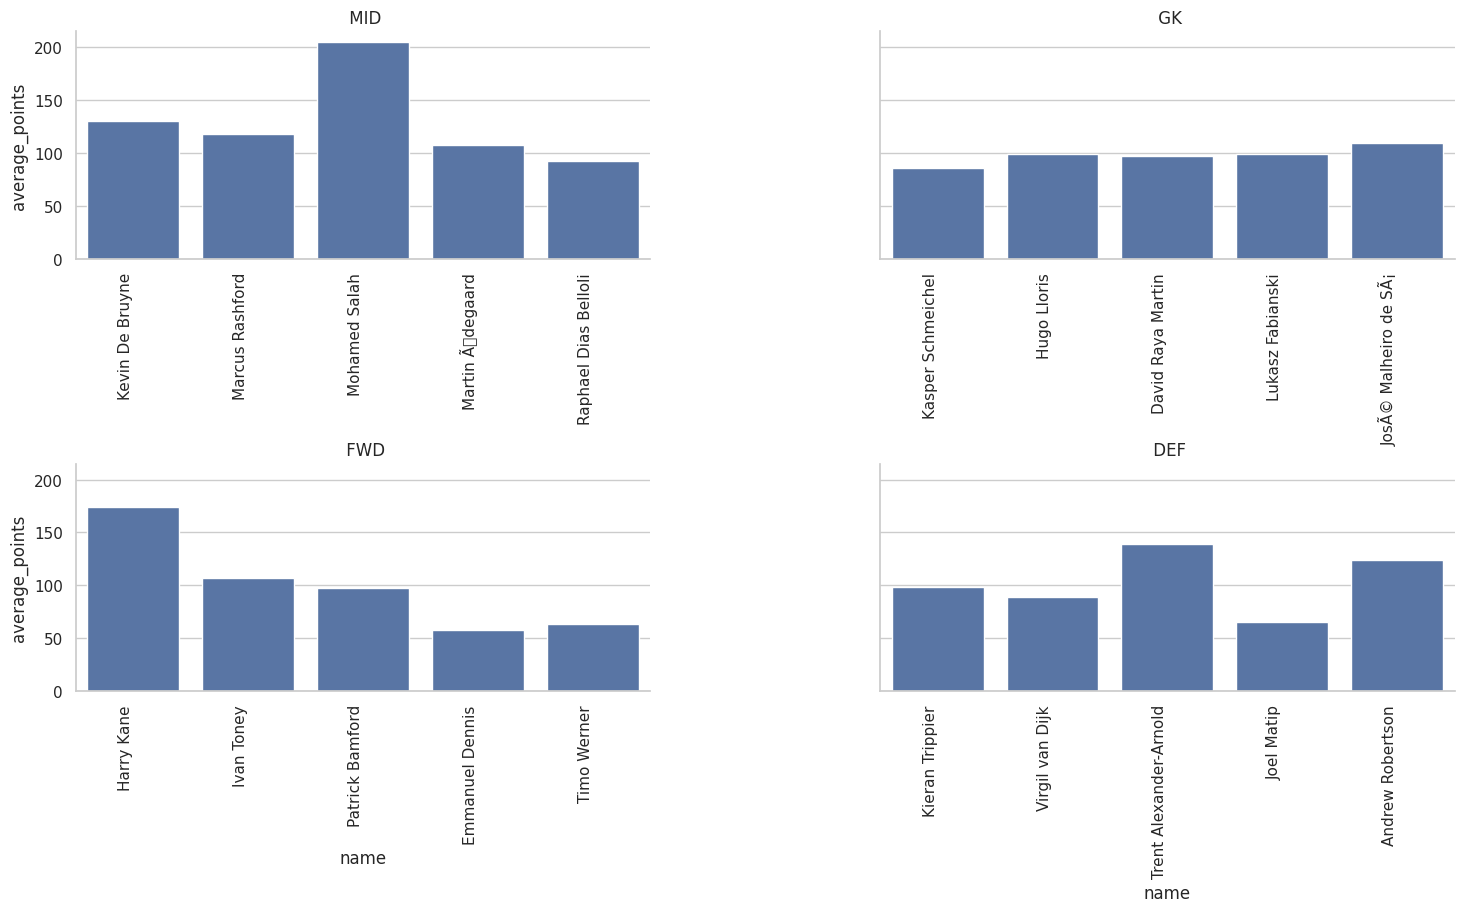

In [ ]:
# Plot settings
sns.set(style="whitegrid")

# Filter the top N consistent players for visualization
top_n = 5
consistent_players_top = consistent_players_by_position.groupby('position').head(top_n)

# Set the style for the seaborn plots
sns.set(style="whitegrid")

# Create the FacetGrid object with more space for each subplot
g = sns.FacetGrid(consistent_players_top, col='position', col_wrap=2, sharex=False, height=5, aspect=1.5)

# Map the barplot to the FacetGrid
g.map_dataframe(sns.barplot, x='name', y='average_points')

# Iterate over each subplot (Axes object) to configure the x-axis labels
for ax in g.axes.flatten():
    # Rotate the x-axis labels for each plot
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

    # Set the title for each plot
    ax.set_title(ax.get_title().split('=')[1])

# Adjust the layout to prevent labels from overlapping and to accommodate the rotation
plt.subplots_adjust(bottom=0.3, hspace=0.9, wspace=0.4)

# Show the plot
plt.show()




In [65]:
master_df.columns

import pandas as pd

# Load your dataset into a DataFrame
df = master_df[['team','season','team_h_score','team_a_score','was_home','opponent_team_name']].drop_duplicates()

# Create a column for the team's score and the opponent's score
df['team_score'] = df.apply(lambda x: x['team_h_score'] if x['was_home'] else x['team_a_score'], axis=1)
df['opponent_score'] = df.apply(lambda x: x['team_a_score'] if x['was_home'] else x['team_h_score'], axis=1)
df['game_status'] = np.where(df['team_score']>df['opponent_score'],'Win',np.where(df['team_score']==df['opponent_score'],'Draw','Loss'))
df['points'] = np.where(df['game_status']=='Win',3, np.where(df['game_status']=='Draw',1,0))

In [68]:
df.sort_values(by = ['team','season']).head(40)

,team,season,team_h_score,team_a_score,was_home,opponent_team_name,team_score,opponent_score,game_status,points
404,Arsenal,2020-21,3,1,True,Chelsea,3,1,Win,3
1086,Arsenal,2020-21,0,1,False,Chelsea,1,0,Win,3
1723,Arsenal,2020-21,3,0,True,Newcastle,3,0,Win,3
2263,Arsenal,2020-21,0,2,False,Newcastle,2,0,Win,3
2692,Arsenal,2020-21,1,2,True,Wolves,1,2,Loss,0
3061,Arsenal,2020-21,2,1,False,Wolves,1,2,Loss,0
3932,Arsenal,2020-21,2,0,False,Spurs,0,2,Loss,0
4479,Arsenal,2020-21,2,1,True,Spurs,2,1,Win,3
6161,Arsenal,2020-21,2,1,True,Sheffield Utd,2,1,Win,3
7016,Arsenal,2020-21,0,3,False,Sheffield Utd,3,0,Win,3


In [ ]:

# Continue working with the df that already has 'team_score', 'opponent_score', 'game_status', and 'points'

# Group by team and season to aggregate the statistics
team_performance = df.groupby(['team', 'season']).agg({
    'points': 'sum',
    'game_status': ['count',
                    lambda x: np.sum(x=='Win'),
                    lambda x: np.sum(x=='Draw'),
                    lambda x: np.sum(x=='Loss')],
    'was_home': [lambda x: np.sum(x),
                 lambda x: np.sum(~x)]
}).reset_index()

# Flatten the MultiIndex for columns
team_performance.columns = ['team', 'season', 'total_points', 'games_played', 'wins', 'draws', 'losses', 'home_games', 'away_games']

# Now, calculate home and away specific stats
home_stats = df[df['was_home']].groupby(['team', 'season']).agg({
    'game_status': [lambda x: np.sum(x=='Win'), lambda x: np.sum(x=='Loss')]
}).reset_index()

away_stats = df[~df['was_home']].groupby(['team', 'season']).agg({
    'game_status': [lambda x: np.sum(x=='Win'), lambda x: np.sum(x=='Loss')]
}).reset_index()

# Flatten the MultiIndex for columns
home_stats.columns = ['team', 'season', 'home_wins', 'home_losses']
away_stats.columns = ['team', 'season', 'away_wins', 'away_losses']

# Merge home and away stats into the team_performance DataFrame
team_performance = team_performance.merge(home_stats, on=['team', 'season'], how='left')
team_performance = team_performance.merge(away_stats, on=['team', 'season'], how='left')

# Aggregate team stats including goals scored and conceded
team_goals_stats = df.groupby(['team', 'season']).agg({
    'team_score': 'sum',  # Total goals scored by the team
    'opponent_score': 'sum',  # Total goals conceded by the team
}).reset_index()

# Rename the columns
team_goals_stats.rename(columns={'team_score': 'goals_scored', 'opponent_score': 'goals_conceded'}, inplace=True)

# Merge the goals stats with the team performance DataFrame
team_performance = team_performance.merge(team_goals_stats, on=['team', 'season'], how='left')


In [ ]:
# team_performance['team'].unique()
big_10_teams = ['Arsenal', 'Brighton', 'Chelsea','Liverpool',  'Man City', 'Man Utd','Newcastle', 'Spurs','Aston Villa', 'Bournemouth', 'Brentford', 'Crystal Palace', 'Everton']
# Filter the team_performance DataFrame to only include the big 10 teams
big_10_team_performance = team_performance[team_performance['team'].isin(big_10_teams)]


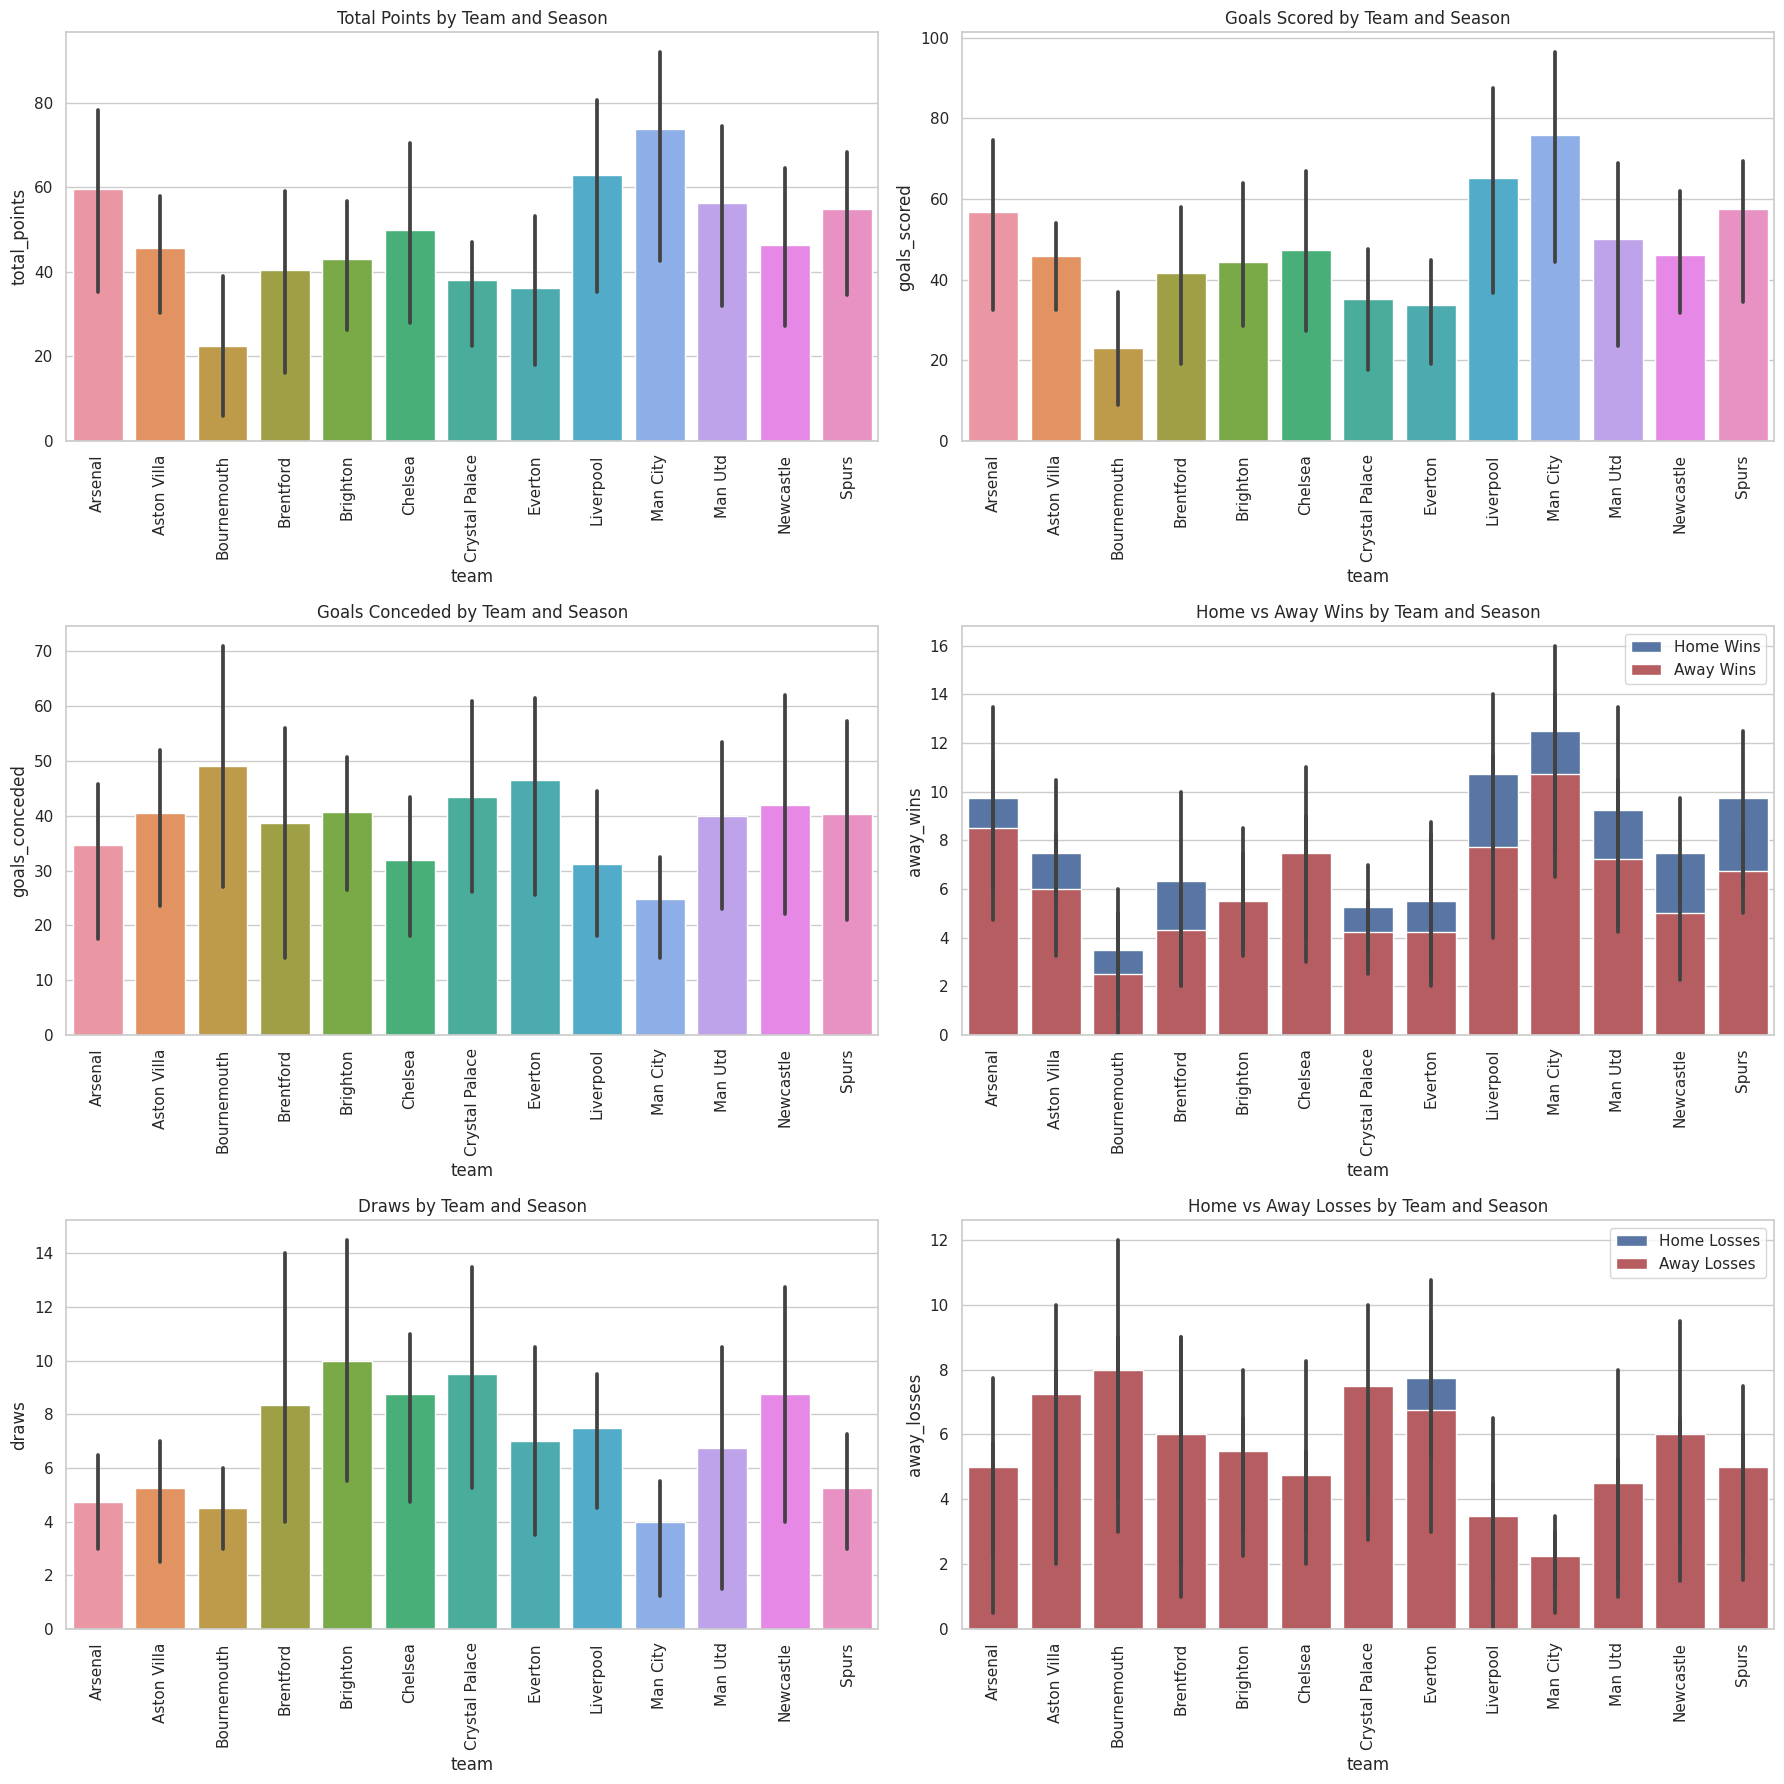

In [ ]:
# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Total points
sns.barplot(x='team', y='total_points', data=big_10_team_performance, ax=axes[0, 0])
axes[0, 0].set_title('Total Points by Team and Season')
axes[0, 0].tick_params(axis='x', rotation=90)

# Goals Scored
sns.barplot(x='team', y='goals_scored', data=big_10_team_performance, ax=axes[0, 1])
axes[0, 1].set_title('Goals Scored by Team and Season')
axes[0, 1].tick_params(axis='x', rotation=90)

# Goals Conceded
sns.barplot(x='team', y='goals_conceded', data=big_10_team_performance, ax=axes[1, 0])
axes[1, 0].set_title('Goals Conceded by Team and Season')
axes[1, 0].tick_params(axis='x', rotation=90)

# Home Wins vs Away Wins
sns.barplot(x='team', y='home_wins', data=big_10_team_performance, label='Home Wins', color='b', ax=axes[1, 1])
sns.barplot(x='team', y='away_wins', data=big_10_team_performance, label='Away Wins', color='r', ax=axes[1, 1])
axes[1, 1].set_title('Home vs Away Wins by Team and Season')
axes[1, 1].tick_params(axis='x', rotation=90)
axes[1, 1].legend()

# Draws
sns.barplot(x='team', y='draws', data=big_10_team_performance, ax=axes[2, 0])
axes[2, 0].set_title('Draws by Team and Season')
axes[2, 0].tick_params(axis='x', rotation=90)

# Home Losses vs Away Losses
sns.barplot(x='team', y='home_losses', data=big_10_team_performance, label='Home Losses', color='b', ax=axes[2, 1])
sns.barplot(x='team', y='away_losses', data=big_10_team_performance, label='Away Losses', color='r', ax=axes[2, 1])
axes[2, 1].set_title('Home vs Away Losses by Team and Season')
axes[2, 1].tick_params(axis='x', rotation=90)
axes[2, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [15]:
df.head().to_csv('sample.csv')

In [30]:
df['season'].unique()

array(['2020-21', '2021-22', '2022-23', '2023-24'], dtype=object)

In [13]:
df.columns

Index(['name', 'GW', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'position', 'red_cards', 'round',
       'saves', 'selected', 'team', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'value', 'was_home', 'xP', 'yellow_cards', 'season',
       'opponent_team_name'],
      dtype='object')

In [14]:
columns_to_keep = ['name', 'position','GW', 'assists', 'bps', 'clean_sheets', 'creativity',
      'goals_conceded', 'goals_scored', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards',
       'saves', 'selected', 'team', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'value', 'was_home', 'xP', 'yellow_cards', 'season',
       'opponent_team_name']



In [15]:
new_df = df[columns_to_keep]

In [16]:
new_df['team_score'] = new_df.apply(lambda x: x['team_h_score'] if x['was_home'] else x['team_a_score'], axis=1)
new_df['opponent_score'] = new_df.apply(lambda x: x['team_a_score'] if x['was_home'] else x['team_h_score'], axis=1)
new_df['game_status'] = np.where(new_df['team_score']>new_df['opponent_score'],'Win',
                                 np.where(new_df['team_score']==new_df['opponent_score'],'Draw','Loss'))
new_df['points'] = np.where(new_df['game_status']=='Win',3, np.where(new_df['game_status']=='Draw',1,0))

In [17]:
new_df.sort_values(by=['name', 'season', 'GW'], inplace=True)

# Define the statistics for which you want to calculate rolling averages
player_stats = ['assists', 'bps', 'clean_sheets', 'creativity',
       'goals_conceded', 'goals_scored', 'influence','own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'saves','total_points']  # Add more player stats as needed


# Create rolling averages for 1-5 game windows and their lagged values in new_df
for stat in player_stats:
    for window in range(1, 6):
        # Calculate rolling average for each window size
        rolling_avg_col = f'{stat}_rolling_avg_{window}'
        rolling_avg = new_df.groupby(['name', 'season'])[stat].rolling(window=window, min_periods=1).mean().shift(1)
        rolling_avg.reset_index(level=[0, 1], drop=True, inplace=True)
        new_df[rolling_avg_col] = rolling_avg

        # # Create lagged features for each rolling average
        # for lag in range(1, 6):
        #     lagged_col = f'{rolling_avg_col}_lag_{lag}'
        #     lagged_rolling_avg = new_df.groupby(['name', 'season'])[rolling_avg_col].shift(lag)
        #     # lagged_rolling_avg.reset_index(level=[0, 1], drop=True, inplace=True)
        #     new_df[lagged_col] = lagged_rolling_avg

# Handling missing values in new_df
new_df.fillna(0, inplace=True)

In [18]:
new_df['kickoff_time'] = pd.to_datetime(new_df['kickoff_time'])

# Extract year, month, and day
new_df['kickoff_time_year'] = new_df['kickoff_time'].dt.year
new_df['kickoff_time_month'] = new_df['kickoff_time'].dt.month
new_df['kickoff_time_day'] = new_df['kickoff_time'].dt.day
new_df['kickoff_time_day_of_week'] = new_df['kickoff_time'].dt.dayofweek

# Function to categorize time of day
def categorize_time_of_day(time):
    if 5 <= time.hour < 12:
        return 'morning'
    elif 12 <= time.hour < 18:
        return 'afternoon'
    elif 18 <= time.hour < 22:
        return 'evening'
    else:
        return 'night'

# Apply the function to categorize time of day
new_df['time_of_day'] = new_df['kickoff_time'].apply(categorize_time_of_day)


In [22]:
print(new_df.columns[0:100])

Index(['name', 'position', 'GW', 'assists', 'bps', 'clean_sheets',
       'creativity', 'goals_conceded', 'goals_scored', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'saves', 'selected',
       'team', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'value', 'was_home', 'xP', 'yellow_cards', 'season',
       'opponent_team_name', 'team_score', 'opponent_score', 'game_status',
       'points', 'assists_rolling_avg_1', 'assists_rolling_avg_2',
       'assists_rolling_avg_3', 'assists_rolling_avg_4',
       'assists_rolling_avg_5', 'bps_rolling_avg_1', 'bps_rolling_avg_2',
       'bps_rolling_avg_3', 'bps_rolling_avg_4', 'bps_rolling_avg_5',
       'clean_sheets_rolling_avg_1', 'clean_sheets_rolling_avg_2',
       'clean_sheets_rolling_avg_3', 'clean_sheets_rolling_avg_4',
       'clean_sheets_rolling_avg_5', 'creativity_rolling_avg_1',
       'creativity_rolling_avg_2', 'creativit

In [26]:
df.columns

Index(['name', 'GW', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'position', 'red_cards', 'round',
       'saves', 'selected', 'team', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'value', 'was_home', 'xP', 'yellow_cards', 'season',
       'opponent_team_name'],
      dtype='object')

In [116]:
team_perf_df = new_df.groupby(['season','GW','team','opponent_team_name','team_score','opponent_score','was_home']).agg({'threat':'mean','points': 'mean','total_points' : 'sum'}).reset_index()

In [117]:
team_perf_df = team_perf_df.sort_values(by = ['season','team','GW']).reset_index(drop = True)

In [118]:
team_perf_df

,season,GW,team,opponent_team_name,team_score,opponent_score,was_home,threat,points,total_points
0,2020-21,1,Arsenal,Fulham,3,0,False,7.250000,3.0,82
1,2020-21,2,Arsenal,West Ham,2,1,True,4.419355,3.0,46
2,2020-21,3,Arsenal,Liverpool,1,3,False,2.125000,0.0,23
3,2020-21,4,Arsenal,Sheffield Utd,2,1,True,3.968750,3.0,45
4,2020-21,5,Arsenal,Man City,0,1,False,3.636364,0.0,25
...,...,...,...,...,...,...,...,...,...,...
2495,2023-24,7,Wolves,Man City,2,1,True,0.970588,3.0,37
2496,2023-24,8,Wolves,Aston Villa,1,1,True,2.529412,1.0,32
2497,2023-24,9,Wolves,Bournemouth,2,1,False,6.500000,3.0,38
2498,2023-24,10,Wolves,Newcastle,2,2,True,4.735294,1.0,35


In [119]:
rolling_avg_cols = ['team_score', 'opponent_score', 'threat', 'points', 'total_points']

# Calculate rolling averages for 1-5 and 1-7 game windows
for window in range(1, 8):  # Including 1 to 7
    for col in rolling_avg_cols:
        team_perf_df[f'{col}_rolling_avg_{window}'] = team_perf_df.groupby(['team', 'season'])[col].rolling(window=window, min_periods=1).mean().shift(1).reset_index(level=[0, 1], drop=True)

# Function to calculate win streaks
def calculate_win_streaks(df, is_home, window):
    df = df.copy()
    if is_home:
        df['win'] = (df['was_home'] & (df['points'] == 3)).astype(int)
    else:
        df['win'] = (~df['was_home'] & (df['points'] == 3)).astype(int)

    df['win_streak'] = df.groupby(['team', 'season'])['win'].rolling(window=window, min_periods=1).sum().shift(1).reset_index(level=[0, 1], drop=True)
    return df['win_streak']

# Calculate home and away win streaks for windows of 3 and 7 games
for window in [3, 7]:
    team_perf_df[f'home_win_streak_{window}'] = calculate_win_streaks(team_perf_df, is_home=True, window=window)
    team_perf_df[f'away_win_streak_{window}'] = calculate_win_streaks(team_perf_df, is_home=False, window=window)


# # Calculate opponent team form based on the same metrics
# for window in range(1, 8):
#     for col in form_cols:
#         # Calculate rolling average for opponent teams
#         team_perf_df[f'opp_{col}_form_{window}'] = team_perf_df.groupby(['opponent_team_name', 'season'])[col].rolling(window=window, min_periods=1).mean().shift(1).reset_index(level=[0, 1], drop=True)

#         # Map opponent team form to each match
#         team_perf_df = team_perf_df.merge(team_df[['season', 'GW', 'team', f'opp_{col}_form_{window}']].rename(columns={'team': 'opponent_team_name', f'opp_{col}_form_{window}': f'opponent_{col}_form_{window}'}),
#                                 on=['season', 'GW', 'opponent_team_name'],
#                                 how='left')
# Handling missing values
team_perf_df.fillna(0, inplace=True)


In [120]:
team_perf_df

,season,GW,team,opponent_team_name,team_score,opponent_score,was_home,threat,points,total_points,...,total_points_rolling_avg_6,team_score_rolling_avg_7,opponent_score_rolling_avg_7,threat_rolling_avg_7,points_rolling_avg_7,total_points_rolling_avg_7,home_win_streak_3,away_win_streak_3,home_win_streak_7,away_win_streak_7
0,2020-21,1,Arsenal,Fulham,3,0,False,7.250000,3.0,82,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,2020-21,2,Arsenal,West Ham,2,1,True,4.419355,3.0,46,...,82.000000,3.000000,0.000000,7.250000,3.000000,82.000000,0.0,1.0,0.0,1.0
2,2020-21,3,Arsenal,Liverpool,1,3,False,2.125000,0.0,23,...,64.000000,2.500000,0.500000,5.834677,3.000000,64.000000,1.0,1.0,1.0,1.0
3,2020-21,4,Arsenal,Sheffield Utd,2,1,True,3.968750,3.0,45,...,50.333333,2.000000,1.333333,4.598118,2.000000,50.333333,1.0,1.0,1.0,1.0
4,2020-21,5,Arsenal,Man City,0,1,False,3.636364,0.0,25,...,49.000000,2.000000,1.250000,4.440776,2.250000,49.000000,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2023-24,7,Wolves,Man City,2,1,True,0.970588,3.0,37,...,32.166667,1.000000,2.000000,4.464736,0.666667,32.166667,0.0,0.0,0.0,1.0
2496,2023-24,8,Wolves,Aston Villa,1,1,True,2.529412,1.0,32,...,34.333333,1.142857,1.857143,3.965572,1.000000,32.857143,1.0,0.0,1.0,1.0
2497,2023-24,9,Wolves,Bournemouth,2,1,False,6.500000,3.0,38,...,36.833333,1.285714,1.857143,3.212631,1.142857,34.000000,1.0,0.0,1.0,1.0
2498,2023-24,10,Wolves,Newcastle,2,2,True,4.735294,1.0,35,...,33.166667,1.428571,1.428571,3.193583,1.571429,37.000000,1.0,1.0,1.0,2.0


In [125]:
opponent_metrics['opponent_team_name'].unique()

array(['Arsenal', 'Aston Villa', 'Brighton', 'Burnley', 'Chelsea',
       'Crystal Palace', 'Everton', 'Fulham', 'Leeds', 'Leicester',
       'Liverpool', 'Man City', 'Man Utd', 'Newcastle', 'Sheffield Utd',
       'Southampton', 'Spurs', 'West Brom', 'West Ham', 'Wolves',
       'Brentford', 'Norwich', 'Watford', 'Bournemouth', "Nott'm Forest",
       'Luton'], dtype=object)

In [135]:
team_perf_df

,season,GW,team,opponent_team_name,team_score,opponent_score,was_home,threat,points,total_points,...,total_points_rolling_avg_6,team_score_rolling_avg_7,opponent_score_rolling_avg_7,threat_rolling_avg_7,points_rolling_avg_7,total_points_rolling_avg_7,home_win_streak_3,away_win_streak_3,home_win_streak_7,away_win_streak_7
0,2020-21,1,Arsenal,Fulham,3,0,False,7.250000,3.0,82,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,2020-21,2,Arsenal,West Ham,2,1,True,4.419355,3.0,46,...,82.000000,3.000000,0.000000,7.250000,3.000000,82.000000,0.0,1.0,0.0,1.0
2,2020-21,3,Arsenal,Liverpool,1,3,False,2.125000,0.0,23,...,64.000000,2.500000,0.500000,5.834677,3.000000,64.000000,1.0,1.0,1.0,1.0
3,2020-21,4,Arsenal,Sheffield Utd,2,1,True,3.968750,3.0,45,...,50.333333,2.000000,1.333333,4.598118,2.000000,50.333333,1.0,1.0,1.0,1.0
4,2020-21,5,Arsenal,Man City,0,1,False,3.636364,0.0,25,...,49.000000,2.000000,1.250000,4.440776,2.250000,49.000000,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2023-24,7,Wolves,Man City,2,1,True,0.970588,3.0,37,...,32.166667,1.000000,2.000000,4.464736,0.666667,32.166667,0.0,0.0,0.0,1.0
2496,2023-24,8,Wolves,Aston Villa,1,1,True,2.529412,1.0,32,...,34.333333,1.142857,1.857143,3.965572,1.000000,32.857143,1.0,0.0,1.0,1.0
2497,2023-24,9,Wolves,Bournemouth,2,1,False,6.500000,3.0,38,...,36.833333,1.285714,1.857143,3.212631,1.142857,34.000000,1.0,0.0,1.0,1.0
2498,2023-24,10,Wolves,Newcastle,2,2,True,4.735294,1.0,35,...,33.166667,1.428571,1.428571,3.193583,1.571429,37.000000,1.0,1.0,1.0,2.0


In [139]:
# team_perf_df

opponent_metrics = team_perf_df[['season', 'GW', 'team','opponent_team_name'] + list(team_perf_df.columns[10:])].copy()

# Rename the columns to indicate they are opponent's metrics
opponent_metrics.columns = ['season', 'GW', 'opponent_team_name', 'team'] + [f'opponent_{col}' for col in opponent_metrics.columns[4:]]

# Perform the self-join
# Join the original DataFrame with opponent_metrics on season, GW, and opponent_team_name
team_perf_df = team_perf_df.merge(opponent_metrics, on=['season', 'GW','team', 'opponent_team_name'])


In [147]:
new_df.shape

(84116, 104)

In [145]:
final_df = pd.merge(new_df,
    team_perf_df.drop(columns = [ 'team_score',
       'opponent_score', 'was_home', 'threat', 'points', 'total_points']),
                    how = 'left',
                    on = ['season', 'GW', 'team','opponent_team_name'])

In [148]:
model_df = final_df.drop(columns = ['assists', 'bps', 'clean_sheets', 'creativity',
       'goals_conceded', 'goals_scored', 'influence', 'kickoff_time',
       'minutes','own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'saves', 'selected', 'team',
       'team_a_score', 'team_h_score', 'threat','team_score', 'opponent_score', 'game_status', 'points','yellow_cards' ,'xP'])

In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Define features (X) and target variable (y)
X = model_df.drop(columns=['total_points', 'name', 'season', 'opponent_team_name'])
y = model_df['total_points']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Machine': SVR()
}

# Training and evaluating models
results = {}
for model_name, model in models.items():
    print(model)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    results[model_name] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

# Output results
print(results)


LinearRegression()
DecisionTreeRegressor(random_state=42)
RandomForestRegressor(random_state=42)
GradientBoostingRegressor(random_state=42)
SVR()
{'Linear Regression': {'MSE': 4.3247958110131535, 'MAE': 1.165069551508709, 'R2': 0.275725019655363}, 'Decision Tree': {'MSE': 8.742079057034923, 'MAE': 1.4458620621334601, 'R2': -0.4640388619230411}, 'Random Forest': {'MSE': 4.141542244488479, 'MAE': 1.1087159632219366, 'R2': 0.30641455485948865}, 'Gradient Boosting': {'MSE': 4.2158891749987575, 'MAE': 1.1092481871027449, 'R2': 0.29396364989493684}, 'Support Vector Machine': {'MSE': 4.677616896833007, 'MAE': 0.9840188524058846, 'R2': 0.21663795608889047}}


In [160]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError


In [183]:
# model_df_cop = model_df.copy()
model_df = model_df_cop.copy()

In [184]:
# Convert 'position' to one-hot encoded features
# One-hot encode 'position'
one_hot_encoder = OneHotEncoder()
positions_encoded = one_hot_encoder.fit_transform(model_df[['position']]).toarray()

# Manually create feature names for the one-hot encoded columns
position_categories = one_hot_encoder.categories_[0]
position_feature_names = ['position_' + category for category in position_categories]

# Create a DataFrame from the one-hot encoded array
positions_encoded_df = pd.DataFrame(positions_encoded, columns=position_feature_names)


day_encoded = one_hot_encoder.fit_transform(model_df[['time_of_day']]).toarray()

# Manually create feature names for the one-hot encoded columns
day_categories = one_hot_encoder.categories_[0]
day_feature_names = ['time_of_day_' + day for day in day_categories]

# Create a DataFrame from the one-hot encoded array
day_encoded_df = pd.DataFrame(day_encoded, columns=day_feature_names)

# Reset index to align with original DataFrame
model_df.reset_index(drop=True, inplace=True)
positions_encoded_df.reset_index(drop=True, inplace=True)
day_encoded_df.reset_index(drop=True, inplace=True)
model_df['was_home'] = np.where(model_df['was_home'] == True,1,0)

# # Concatenate the one-hot encoded position columns with the original DataFrame
model_df = pd.concat([model_df, positions_encoded_df], axis=1)
model_df = pd.concat([model_df, day_encoded_df], axis=1)



In [185]:
# # Define features (X) and target variable (y)

X = model_df.drop(columns=['total_points', 'name', 'season', 'opponent_team_name','position','time_of_day'])
feature_columns = list(X.columns) + list(positions_encoded_df.columns)
X = X[feature_columns]
y = model_df['total_points']

In [188]:


# Convert categorical features to one-hot encoded features (if needed)
# This step depends on your dataset and categorical feature handling

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data for LSTM [samples, timesteps, features]
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError(), MeanAbsoluteError()])

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

loss, mse, mae = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f'Loss: {loss}, MSE: {mse}, MAE: {mae}')

Loss: 4.472936630249023, MSE: 4.472936630249023, MAE: 1.1430346965789795


In [214]:
model_df.shape

(84116, 164)

In [199]:
{'Linear Regression': {'MSE': 4.3247958110131535, 'MAE': 1.165069551508709, 'R2': 0.275725019655363},
 'Decision Tree': {'MSE': 8.742079057034923, 'MAE': 1.4458620621334601, 'R2': -0.4640388619230411},
 'Random Forest': {'MSE': 4.141542244488479, 'MAE': 1.1087159632219366, 'R2': 0.30641455485948865},
 'Gradient Boosting': {'MSE': 4.2158891749987575, 'MAE': 1.1092481871027449, 'R2': 0.29396364989493684},
 'Support Vector Machine': {'MSE': 4.677616896833007, 'MAE': 0.9840188524058846, 'R2': 0.21663795608889047}
 'LSTM' : { 'MSE': 4.472936630249023, 'MAE': 1.1430346965789795}}